# Лабораторная работа №2

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

### Чтение датасета

In [2]:
iris_csv = pd.read_csv("iris.csv")
print(iris_csv)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


### Масштабирование данных

In [3]:
scaler = MinMaxScaler()
scaler.fit(iris_csv.drop('variety', axis = 1)) # обучение датасета
scaled_features = scaler.transform(iris_csv.drop('variety', axis = 1)) # стандартизация признаков
scaled_data = pd.DataFrame(scaled_features, columns = iris_csv.drop('variety', axis = 1).columns)
print(scaled_data)

     sepal.length  sepal.width  petal.length  petal.width
0        0.222222     0.625000      0.067797     0.041667
1        0.166667     0.416667      0.067797     0.041667
2        0.111111     0.500000      0.050847     0.041667
3        0.083333     0.458333      0.084746     0.041667
4        0.194444     0.666667      0.067797     0.041667
..            ...          ...           ...          ...
145      0.666667     0.416667      0.711864     0.916667
146      0.555556     0.208333      0.677966     0.750000
147      0.611111     0.416667      0.711864     0.791667
148      0.527778     0.583333      0.745763     0.916667
149      0.444444     0.416667      0.694915     0.708333

[150 rows x 4 columns]


### Кластеризация методом k-средних

c:\Users\1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


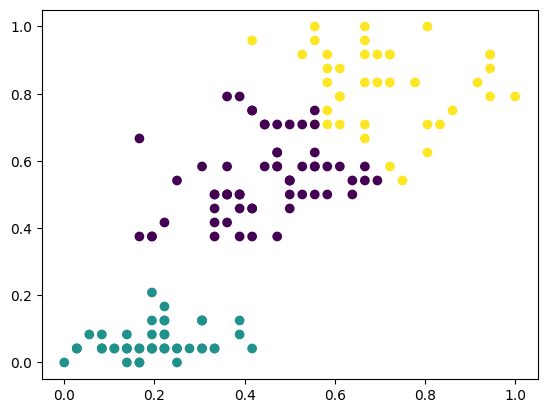

In [4]:
model = KMeans(n_clusters=3)
model.fit(scaled_data)
predict = model.predict(scaled_data)
plt.scatter(scaled_data["sepal.length"], scaled_data["petal.width"], c=predict)

### Реальные значения

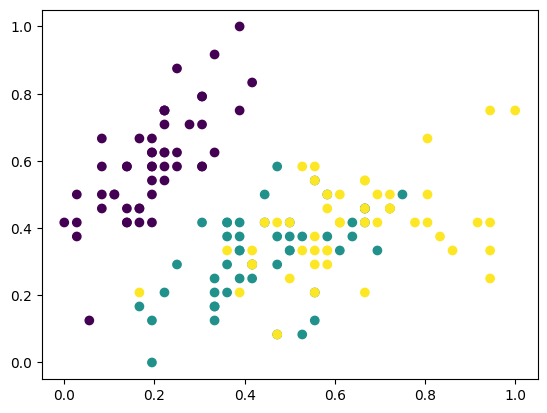

In [5]:
classes = []
for iris in iris_csv.values:
    if iris[-1] == "Setosa":
        classes.append(0)
    elif iris[-1] == "Versicolor":
        classes.append(1)
    else:
        classes.append(2)
plt.scatter(scaled_data["sepal.length"], scaled_data["sepal.width"], c=classes)

## Оценка кластеризации

In [6]:
model.cluster_centers_

array([[0.44125683, 0.30737705, 0.57571548, 0.54918033],
       [0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632]])

In [7]:
labels = model.labels_
metrics.silhouette_score(scaled_data, labels, metric='euclidean') #Коэффициент силуета

0.5047687565398589